In [32]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.exposure import rescale_intensity
from skimage import img_as_float

In [232]:
def analyze(image, mask):
    print(f"Got image: {image}, mask:{mask}")
    img_nifti = nib.load(image)
    mask_nifti = nib.load(mask)
    img = img_nifti.get_fdata()
    mask = mask_nifti.get_fdata()
    clipped = img * mask
    print(img.shape, mask.shape)
    clipped = np.rot90(np.flipud(clipped), 3)
    return clipped, np.rot90(np.flipud(mask),3)

In [233]:
i, lung_mask = analyze("28556089.nii", "label.nii.gz")
lung_normal = np.copy(i)
lung_lesion = np.copy(i)

Got image: 28556089.nii, mask:label.nii.gz
(196, 196, 173) (196, 196, 173)


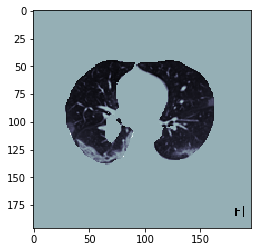

In [234]:
lung_normal.min(), lung_normal.max()
plt.imshow(lung_normal[:,:,80], cmap="bone")

In [235]:
#z[(i<=0)&(i<=-600)] = 1
lung_normal[(lung_normal>=-1024)&(lung_normal<=-600)] = 9999
lung_normal[(lung_normal<9999)] = 0

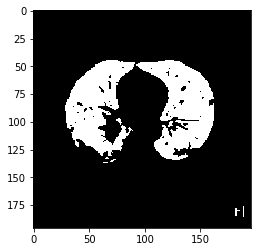

In [236]:
plt.imshow(lung_normal[:,:,80], cmap="bone")

In [237]:
lung_normal.min(), lung_normal.max()

(0.0, 9999.0)

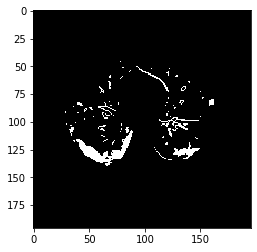

In [238]:
lung_lesion[(lung_lesion>=-600)&(lung_lesion<=0)] = 9999
lung_lesion[(lung_lesion<9999)] = 0
plt.imshow(lung_lesion[:,:,80]*lung_mask[:,:,80] , cmap="bone")

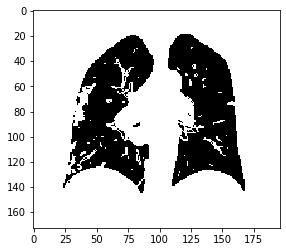

In [239]:
plt.imshow(np.rot90(lung_lesion[104,:, :]), cmap="bone")